In [176]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [177]:
df = pd.read_csv('/Users/justinsmith/Documents/GitHub/europe_data.csv')

In [178]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [179]:
df.shape

(8594, 13)

In [180]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [214]:
df.dropna(inplace=True)
df.shape

(8147, 17)

In [186]:
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
                                
# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [187]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7332 entries, 0 to 7741
Data columns (total 16 columns):
year       7332 non-null int64
tvtot      7332 non-null float64
ppltrst    7332 non-null float64
pplfair    7332 non-null float64
pplhlp     7332 non-null float64
happy      7332 non-null float64
sclmeet    7332 non-null float64
sclact     7332 non-null float64
gndr       7332 non-null float64
agea       7332 non-null float64
CH         7332 non-null uint8
CZ         7332 non-null uint8
DE         7332 non-null uint8
ES         7332 non-null uint8
NO         7332 non-null uint8
SE         7332 non-null uint8
dtypes: float64(9), int64(1), uint8(6)
memory usage: 673.1 KB


In [188]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# # Accuracy tables.
table_test = pd.crosstab(y_test, predict_test, margins=True)
table_train = pd.crosstab(y_train, predict_train, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


In [189]:
boost = ensemble.GradientBoostingClassifier(loss='deviance',n_estimators=1000,
                                            learning_rate=0.2, max_depth=4)

In [190]:
boost.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [191]:
predict_train_boost = boost.predict(X_train)
predict_test_boost = boost.predict(X_test)

# # Accuracy tables.
table_test_boost = pd.crosstab(y_test, predict_test_boost, margins=True)
table_train_boost = pd.crosstab(y_train, predict_train_boost, margins=True)

train_tI_errors_boost = table_train_boost.loc[0.0,1.0] / table_train_boost.loc['All','All']
train_tII_errors_boost = table_train_boost.loc[1.0,0.0] / table_train_boost.loc['All','All']

test_tI_errors_boost = table_test_boost.loc[0.0,1.0]/table_test_boost.loc['All','All']
test_tII_errors_boost = table_test_boost.loc[1.0,0.0]/table_test_boost.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors_boost, train_tII_errors_boost, test_tI_errors_boost, 
         test_tII_errors_boost))

Training set accuracy:
Percent Type I errors: 0.0036824877250409165
Percent Type II errors: 0.03150572831423895

Test set accuracy:
Percent Type I errors: 0.11288343558282209
Percent Type II errors: 0.16809815950920245


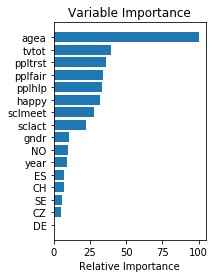

In [192]:
feature_importance_b = boost.feature_importances_

# Make importances relative to max importance.
feature_importance_b = 100.0 * (feature_importance_b / feature_importance_b.max())
sorted_idx_b = np.argsort(feature_importance_b)
pos_b = np.arange(sorted_idx_b.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos_b, feature_importance_b[sorted_idx_b], align='center')
plt.yticks(pos_b, X.columns[sorted_idx_b])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [249]:
# New features

df['happy_age'] = df['happy'] * df['agea']
df['pplgood'] = df['pplfair'] * df['ppltrst'] * df['pplhlp']
df['social_vs_tv'] = df['tvtot']/(df['sclact'] * df['sclmeet'])
df['age_bin'] = pd.cut(df['agea'], 15, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])

In [250]:
df['age_bin'] = df['age_bin'].astype('int64')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 17 columns):
cntry           8147 non-null object
idno            8147 non-null float64
year            8147 non-null int64
tvtot           8147 non-null float64
ppltrst         8147 non-null float64
pplfair         8147 non-null float64
pplhlp          8147 non-null float64
happy           8147 non-null float64
sclmeet         8147 non-null float64
sclact          8147 non-null float64
gndr            8147 non-null float64
agea            8147 non-null float64
partner         8147 non-null float64
happy_age       8147 non-null float64
pplgood         8147 non-null float64
social_vs_tv    8147 non-null float64
age_bin         8147 non-null int64
dtypes: float64(14), int64(2), object(1)
memory usage: 1.1+ MB


In [307]:
y_2 = df['partner'] - 1
X_2 = df.loc[:, ['gndr', 'happy_age', 'pplgood', 'social_vs_tv', 'age_bin', 
                 'happy', 'tvtot', 'agea']]
                                
# Make the categorical variable 'country' into dummies.
X_2 = pd.concat([X_2, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X_2.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train_2, y_train_2 = X_2[:offset], y_2[:offset]

# And put 10% in the test set.
X_test_2, y_test_2 = X_2[offset:], y_2[offset:]

In [308]:
X_train_2.head()

,gndr,happy_age,pplgood,social_vs_tv,age_bin,happy,tvtot,agea,CH,CZ,DE,ES,NO,SE
0,2.0,480.0,150.0,0.150000,6,8.0,3.0,60.0,1,0,0,0,0,0
1,2.0,531.0,175.0,1.000000,6,9.0,6.0,59.0,1,0,0,0,0,0
2,1.0,168.0,512.0,0.055556,1,7.0,1.0,24.0,1,0,0,0,0,0
3,2.0,640.0,252.0,0.333333,7,10.0,4.0,64.0,1,0,0,0,0,0
4,2.0,440.0,210.0,0.357143,6,8.0,5.0,55.0,1,0,0,0,0,0


In [324]:
params = {'n_estimators': 500,
          'max_depth': 4,
#           'loss': 'exponential',
          'subsample': 0.,
          'learning_rate': 0.03}

# Initialize and fit the model.
clf_2 = ensemble.GradientBoostingClassifier(**params)
clf_2.fit(X_train_2, y_train_2)

predict_train_2 = clf_2.predict(X_train_2)
predict_test_2 = clf_2.predict(X_test_2)

# # Accuracy tables.
table_test_2 = pd.crosstab(y_test_2, predict_test_2, margins=True)
table_train_2 = pd.crosstab(y_train_2, predict_train_2, margins=True)

train_tI_errors_2 = table_train_2.loc[0.0,1.0] / table_train_2.loc['All','All']
train_tII_errors_2 = table_train_2.loc[1.0,0.0] / table_train_2.loc['All','All']

test_tI_errors_2 = table_test_2.loc[0.0,1.0]/table_test_2.loc['All','All']
test_tII_errors_2 = table_test_2.loc[1.0,0.0]/table_test_2.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors_2, train_tII_errors_2, test_tI_errors_2, test_tII_errors_2))

Training set accuracy:
Percent Type I errors: 0.033278777959629025
Percent Type II errors: 0.16189307146753956

Test set accuracy:
Percent Type I errors: 0.06012269938650307
Percent Type II errors: 0.19386503067484662


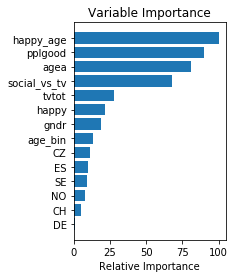

In [310]:
feature_importance_c = clf_2.feature_importances_

# Make importances relative to max importance.
feature_importance_c = 100.0 * (feature_importance_c / feature_importance_c.max())
sorted_idx_c = np.argsort(feature_importance_c)
pos_c = np.arange(sorted_idx_c.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos_c, feature_importance_c[sorted_idx_c], align='center')
plt.yticks(pos_c, X_2.columns[sorted_idx_c])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Modest improvement at best.